## NO-RSD realisation (bias=2)

In [6]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [7]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

We need to provide the following files to the theory object:

In [8]:
theory_path=Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000')
bias_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/BzBlue.txt')
nz_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/NzBlue.txt')
pk_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/Pk_CAMB_test.dat')

Create theory object:

In [9]:
theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=2,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg',
    bias_filename=bias_filename,
    apply_lognormal=True)

Read boxes output.

In [11]:
print(FileFuncs.get_available_runs('/global/cscratch1/sd/cramirez/NBodyKit/multibias/s5/analysis'))

+-------+-------+------+------+--------+------+------+----+
| nside |  rsd  | rmin | rmax | N_bins | zmin | zmax | N  |
+-------+-------+------+------+--------+------+------+----+
|   2   |  rsd  | 0.1  | 200  |   41   | 0.5  | 0.7  | 48 |
|   2   |  rsd  | 0.1  | 200  |   41   | 0.7  | 0.9  | 48 |
|   2   | norsd | 0.1  | 200  |   41   | 0.5  | 0.7  | 48 |
|   2   | norsd | 0.1  | 200  |   41   | 0.7  | 0.9  | 48 |
+-------+-------+------+------+--------+------+------+----+


Expected model:

$$ P_0(k) = < \delta_{\rm LN}^{\rm b} \delta_{\rm LN}^{\rm b} >$$

$$ P_2(K) = 0$$

In [15]:
boxes_path=Path('/global/cscratch1/sd/cramirez/NBodyKit/multibias/s5/analysis')

zmin=0.5
zmax=0.7
rsd=False

sub_boxes = FileFuncs.mix_sims(
    FileFuncs.get_full_path(boxes_path,
                            rsd=rsd,
                            rmin=0.1, rmax=200, N_bins=41,
                            zmin=zmin, zmax=zmax, #Also results for 0.7 and 0.9
                            nside=2)
)
z = theory.get_zeff(zmin=zmin, zmax=zmax) #
print('zeff: ', z)
bias = 2
print('input bias: ', bias)

zeff:  0.5990093404246088
input bias:  2


/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


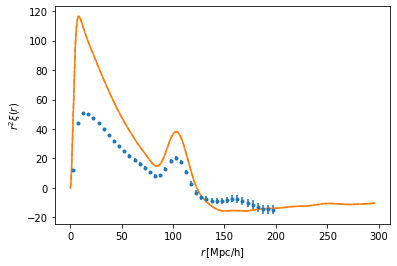

In [17]:
fig, ax = plt.subplots()
pole=0

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_theory(pole=pole, theory=theory, z=z, bias=bias, rsd=rsd, ax=ax, plot_args=dict(c='C1', label='model'))

In [18]:
fitter = Fitter(boxes=sub_boxes, z=z, theory=theory, poles=[0,2], rsd=rsd, bias0=bias,
    smooth_factor0=1, smooth_factor_rsd0=1, smooth_factor_cross0=1)# put here fitted regions

fitter.run_fit(free_params=['bias'])

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


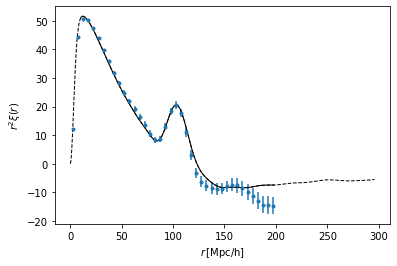

In [19]:
fig, ax = plt.subplots()
pole=0

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


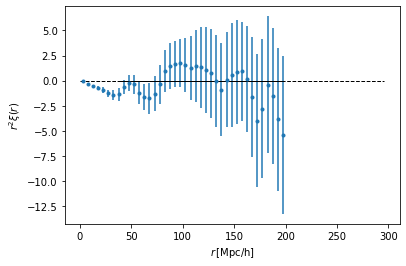

In [20]:
fig, ax = plt.subplots()
pole=2

Plots.plot_data(pole=pole, boxes=sub_boxes, ax=ax, plot_args=dict(c='C0', label='data'))
Plots.plot_best_fit(fitter=fitter, pole=pole, ax=ax, plot_args=dict(c='k', lw=1, label='best fit'))